# Covid VS Commodity

In [4]:
import requests
import pandas as pd
print(f'pandas version : {pd.__version__}')
import seaborn as sns
print(f'Seaborn version : {sns.__version__}')
import re

import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
from matplotlib.axis import Axis
%matplotlib inline
import matplotlib.pyplot as plt
from seaborn.rcmod import palettes

pandas version : 1.5.3
Seaborn version : 0.12.2


### Download data

In [5]:
url_energy_crude_oil_wti = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-energy-crude-oil-wti.csv'
url_energy_gasoline_natural_gas = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-energy-gasoline-natural-gas.csv'
url_energy_heat_oil = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-energy-heat-oil.csv'
url_grain_london_wheat_gbp = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-grains-london-wheat-gbp.csv'
url_grain_oats = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-grains-oats.csv'
url_grain_rough_rice = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-grains-rough-rice.csv'
url_grains_us_corn = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-grains-us-corn.csv'
url_grains_us_soybean_meal = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-grains-us-soybean-meal.csv'
url_grains_us_soybean_oil = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-grains-us-soybean-oil.csv'
url_grains_us_soybeans = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-grains-us-soybeans.csv'
url_grains_us_wheat = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-grains-us-wheat.csv'
url_meat_feeder_cattle = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-meat-feeder_cattle.csv'
url_meat_lean_hogs = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-meat-lean_hogs.csv'
url_meat_live_cattle = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-meat-live_cattle.csv'
url_energy_london_gas_oil = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-energy-london-gas-oil.csv'
url_metal_aluminum = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-aluminum.csv'
url_metal_copper = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-copper.csv'
url_metal_gold = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-gold.csv'
url_metal_lead = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-lead.csv'
url_metal_nickel = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-nickel.csv'
url_metal_palladium = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-palladium.csv'
url_metal_platinum = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-platinum.csv'
url_metal_silver = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-silver.csv'
url_metal_tin = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-tin.csv'
url_metal_zinc = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-metal-zinc.csv'
url_softs_cocoa_london_gbp = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-softs-cocoa-london-gbp.csv'
url_softs_lumber = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-softs-lumber.csv'
url_softs_orange_juice = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-softs-orange-juice.csv'
url_softs_robusta_coffee_london = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-softs-robusta-coffee-london.csv'
url_softs_sugar_london = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-softs-sugar-london.csv'
url_softs_us_cocoa = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-softs-us-cocoa.csv'
url_softs_us_coffee = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-softs-us-coffee-c.csv'
url_softs_us_cotton_2 = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-softs-us-cotton-2.csv'
url_softs_us_sugar_11 = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/cfd-softs-us-sugar-11.csv'
url_covid = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/who-covid-19-global-data-updated.csv'


In [17]:
df1 = pd.read_csv(url_energy_crude_oil_wti)
df2 = pd.read_csv(url_energy_gasoline_natural_gas)
df3 = pd.read_csv(url_energy_heat_oil)
df4 = pd.read_csv(url_grain_london_wheat_gbp)
df5 = pd.read_csv(url_grain_oats)
df6 = pd.read_csv(url_grain_rough_rice)
df7 = pd.read_csv(url_grains_us_corn)
df8 = pd.read_csv(url_grains_us_soybean_meal)
df9 = pd.read_csv(url_grains_us_soybean_oil)
df10 = pd.read_csv(url_grains_us_soybeans)
df11 = pd.read_csv(url_grains_us_wheat)
df12 = pd.read_csv(url_meat_feeder_cattle)
df13 = pd.read_csv(url_meat_lean_hogs)
df14 = pd.read_csv(url_meat_live_cattle)
df15 = pd.read_csv(url_energy_london_gas_oil)
df16 = pd.read_csv(url_metal_aluminum)
df17 = pd.read_csv(url_metal_copper)
df18 = pd.read_csv(url_metal_gold)
df19 = pd.read_csv(url_metal_lead)
df20 = pd.read_csv(url_metal_nickel)
df21 = pd.read_csv(url_metal_palladium)
df22 = pd.read_csv(url_metal_platinum)
df23 = pd.read_csv(url_metal_silver)
df24 = pd.read_csv(url_metal_tin)
df25 = pd.read_csv(url_metal_zinc)
df26 = pd.read_csv(url_softs_cocoa_london_gbp)
df27 = pd.read_csv(url_softs_lumber)
df28 = pd.read_csv(url_softs_orange_juice)
df29 = pd.read_csv(url_softs_robusta_coffee_london)
df30 = pd.read_csv(url_softs_sugar_london)
df31 = pd.read_csv(url_softs_us_cocoa)
df32 = pd.read_csv(url_softs_us_coffee)
df33 = pd.read_csv(url_softs_us_cotton_2)
df34 = pd.read_csv(url_softs_us_sugar_11)
df35 = pd.read_csv(url_covid)

### Prepare data

In [7]:
# Add 4 other columns along with its required data into each dataframe (Required data is Type of commodity, Commodity name, Curreny and Normalized price of each commodity)
from pandas.io.formats.format import DataFrameFormatter
dataframes = [
    [df1,'Energy','Crude Oil','USD'],
    [df2,'Energy','Natural Gas','USD'],
    [df3,'Energy','Heat Oil','USD'],
    [df4,'Grain','Wheat','GBP'],
    [df5,'Grain','Oats','USD'],
    [df6,'Grain','Rough Rice','USD'],
    [df7,'Grain','Corn','USD'],
    [df8,'Grain','Soy Bean Meal','USD'],
    [df9,'Grain','Soy Bean Oil','USD'],
    [df10,'Grain','Soy Beans','USD'],
    [df11,'Grain','Wheat','USD'],
    [df12,'Meat','Feeder Cattle','USD'],
    [df13,'Meat','Lean Hogs','USD'],
    [df14,'Meat','Live Cattle','USD'],
    [df15,'Energy','Gas Oil','USD'],
    [df16,'Metal','Aluminum','USD'],
    [df17,'Metal','Copper','USD'],
    [df18,'Metal','Gold','USD'],
    [df19,'Metal','Lead','USD'],
    [df20,'Metal','Nickel','USD'],
    [df21,'Metal','Palladium','USD'],
    [df22,'Metal','Platinum','USD'],
    [df23,'Metal','Silver','USD'],
    [df24,'Metal','Tin','USD'],
    [df25,'Metal','Zinc','USD'],
    [df26,'Softs','Cocoa','GBP'],
    [df27,'Softs','Lumber','USD'],
    [df28,'Softs','Orange Juice','USD'],
    [df29,'Softs','Robusta Coffee','USD'],
    [df30,'Softs','Sugar','USD'],
    [df31,'Softs','Cocoa','USD'],
    [df32,'Softs','Coffee','USD'],
    [df33,'Softs','Cotton2','USD'],
    [df34,'Softs','Sugar11','USD']
]

for i in range(len(dataframes)):
    dataframes[i][0]['Type'] = dataframes[i][1]
    dataframes[i][0]['Commodity'] = dataframes[i][2]
    dataframes[i][0]['Currency'] = dataframes[i][3]
    dataframes[i][0]['Date'] = pd.to_datetime(dataframes[i][0]['Date'])
    #Normalize the prices so that they can be compared against each other
    dataframes[i][0]['Norm_price'] = (dataframes[i][0]['Price'] - dataframes[i][0]['Price'].min())  / (dataframes[i][0]['Price'].max() - dataframes[i][0]['Price'].min())
    #dataframes[i][0] = dataframes[i][0].rename(columns = {'Price':'P_' + dataframes[i][2]})
    #display(dataframes[i][0])
display(df1)
print(df1['Norm_price'].max())
print(df1['Norm_price'].min())

,Date,Price,Open,High,Low,Vol.,Change %,Type,Commodity,Currency,Norm_price
0,2023-06-16,71.78,70.55,71.89,69.95,NaN,0.0164,Energy,Crude Oil,USD,0.678175
1,2023-06-15,70.62,68.70,70.96,67.97,115610.0,0.0344,Energy,Crude Oil,USD,0.670985
2,2023-06-14,68.27,69.35,70.49,68.07,304450.0,-0.0166,Energy,Crude Oil,USD,0.656419
3,2023-06-13,69.42,67.31,69.83,67.15,366350.0,0.0343,Energy,Crude Oil,USD,0.663547
4,2023-06-12,67.12,70.27,70.33,66.80,404770.0,-0.0435,Energy,Crude Oil,USD,0.649290
...,...,...,...,...,...,...,...,...,...,...,...
909,2020-01-09,59.56,59.99,60.31,58.66,750930.0,-0.0008,Energy,Crude Oil,USD,0.602430
910,2020-01-08,59.61,62.84,65.65,59.15,1210000.0,-0.0493,Energy,Crude Oil,USD,0.602740
911,2020-01-07,62.70,62.91,63.15,62.11,582650.0,-0.0090,Energy,Crude Oil,USD,0.621893
912,2020-01-06,63.27,63.71,64.72,62.64,724240.0,0.0035,Energy,Crude Oil,USD,0.625426


1.0
0.0


In [ ]:
#Merge all commodities to one data frame
df_all = pd.DataFrame()
for i in range(len(dataframes)):
    df_all = pd.concat([df_all, dataframes[i][0]])

#Select only interested columns
df_all = df_all.loc[:,['Date','Price','Vol.','Change %', 'Type', 'Commodity', 'Currency']]

#df_all['Price'] = pd.to_numeric(df_all['Price'], errors = 'coerce')

#Check Merged Data Frame
df_all.info()
#display(df_all)

#Check for NaN
df_all.loc[df_all['Price'].isna(), ['Commodity','Price']].groupby('Commodity').transform('sum')
#df_all['Price'].isna().sum()
df_Null = df_all['Price'].isnull().groupby(df_all['Commodity']).sum().astype(int).reset_index(name='count')
display(df_Null)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30335 entries, 0 to 870
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       30335 non-null  datetime64[ns]
 1   Price      30335 non-null  float64       
 2   Vol.       27069 non-null  float64       
 3   Change %   30335 non-null  float64       
 4   Type       30335 non-null  object        
 5   Commodity  30335 non-null  object        
 6   Currency   30335 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.9+ MB


,Commodity,count
0,Aluminum,0
1,Cocoa,0
2,Coffee,0
3,Copper,0
4,Corn,0
5,Cotton2,0
6,Crude Oil,0
7,Feeder Cattle,0
8,Gas Oil,0
9,Gold,0


In [ ]:
#Check info for each data frame
for i in range(len(dataframes)):
    print(dataframes[i][2])
    dataframes[i][0].info()

Crude Oil
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        914 non-null    datetime64[ns]
 1   Price       914 non-null    float64       
 2   Open        914 non-null    float64       
 3   High        914 non-null    float64       
 4   Low         914 non-null    float64       
 5   Vol.        847 non-null    float64       
 6   Change %    914 non-null    float64       
 7   Type        914 non-null    object        
 8   Commodity   914 non-null    object        
 9   Currency    914 non-null    object        
 10  Norm_price  914 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 78.7+ KB
Natural Gas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      -------

In [ ]:
# Prepare additional data for global new Covid cases
url_global_new_case = 'https://raw.githubusercontent.com/bsssgrace/5001-mini-project/main/global-daily-new-cases.csv'
df36 = pd.read_csv(url_global_new_case)
df36['Date_reported'] = pd.to_datetime(df36['Date_reported'])
#df36['Date_reported'] = df36['Date_reported'].dt.strftime('%Y-%m-%d')
df36.info()
print(df36['New_cases'].min())
print(df36['New_cases'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_reported  1259 non-null   datetime64[ns]
 1   New_cases      1259 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.8 KB
0
7945883


In [ ]:
# Check data info
display(df36)
df36.info()

,Date_reported,New_cases
0,2020-01-03,0
1,2020-01-04,3
2,2020-01-05,0
3,2020-01-06,3
4,2020-01-07,0
...,...,...
1254,2023-06-10,31083
1255,2023-06-11,59592
1256,2023-06-12,28034
1257,2023-06-13,106686


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_reported  1259 non-null   datetime64[ns]
 1   New_cases      1259 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.8 KB


### Plot charts

Text(['2022-11-15'], 6500002, 'China\n Reveal')

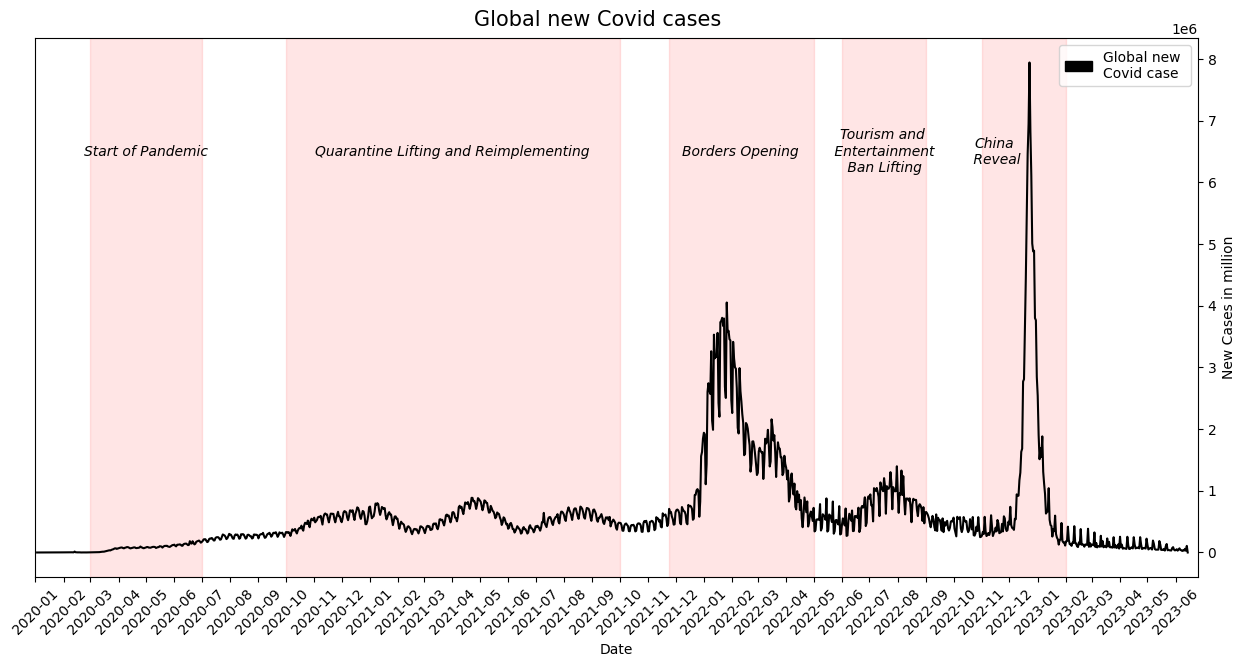

In [ ]:
# overall global covid new cases
plt.figure(figsize = [15,7])
plt.suptitle('Global new Covid cases', size = 15, y=0.92)

ax = sns.lineplot(
        x='Date_reported',
        y='New_cases',
        data=df36,
        color='black',
        sort=True,
        alpha=1
    )

ax_patch = mpatches.Patch(color='black', label='Global new \nCovid case')
ax.legend(handles=[ax_patch], loc="upper right")

# adjust ylabel
plt.ylabel('New Cases in million') # rename y label
ax.yaxis.set_label_position("right") # set y label to right-handed side
ax.yaxis.tick_right() # set utick label to right-handed side

# adjust x axis
locator = mdates.MonthLocator()
Axis.set_major_locator(ax.xaxis,locator)
plt.setp(ax.get_xticklabels(), rotation = 45, horizontalalignment='center')
plt.xlim(*mdates.datestr2num(['2020-01-01', '2023-06-25']))
plt.xlabel('Date')

# add annotate
ax.axvspan(*mdates.datestr2num(['2020-03-01', '2020-07-01']), color="red", alpha=0.1)
ax.annotate('Start of Pandemic', (['2020-03-01'],6500000),
            xytext=(['2020-02-23'], 6500000 + 2), # Offset for the text position
            fontsize = 10,            # Size
            fontstyle = "oblique",    # Style
            color = "black",          # Color
            va = "center",            # Vertical alignment
            ha = "left")              # Horizontal alignment


ax.axvspan(*mdates.datestr2num(['10/01/2020', '10/01/2021']), color="red", alpha=0.1)
ax.annotate('Quarantine Lifting and Reimplementing', (['2021-04-01'],6500000),
            xytext=(['2021-04-01'], 6500000 + 2), # Offset for the text position
            fontsize = 10,            # Size
            fontstyle = "oblique",    # Style
            color = "black",          # Color
            va = "center",            # Vertical alignment
            ha = "center")              # Horizontal alignment


ax.axvspan(*mdates.datestr2num(['11/24/2021', '05/01/2022']), color="red", alpha=0.1)
ax.annotate('Borders Opening', (['2022-02-10'],6500000),
            xytext=(['2022-02-10'], 6500000 + 2), # Offset for the text position
            fontsize = 10,            # Size
            fontstyle = "oblique",    # Style
            color = "black",          # Color
            va = "center",            # Vertical alignment
            ha = "center")            # Horizontal alignment

ax.axvspan(*mdates.datestr2num(['06/01/2022', '09/01/2022']), color="red", alpha=0.1)
ax.annotate('Tourism and\n Entertainment\n Ban Lifting', (['2022-02-10'],6500000),
            xytext=(['2022-07-15'], 6500000 + 2), # Offset for the text position
            fontsize = 10,            # Size
            fontstyle = "oblique",    # Style
            color = "black",          # Color
            va = "center",            # Vertical alignment
            ha = "center")            # Horizontal alignment

ax.axvspan(*mdates.datestr2num(['11/01/2022', '02/01/2023']), color="red", alpha=0.1)
ax.annotate('China\n Reveal', (['2022-11-15'],6500000),
            xytext=(['2022-11-15'], 6500000 + 2), # Offset for the text position
            fontsize = 10,            # Size
            fontstyle = "oblique",    # Style
            color = "black",          # Color
            va = "center",            # Vertical alignment
            ha = "center")            # Horizontal alignment

In [21]:
# extract year and month from date_reported
df35['Year'] = pd.DatetimeIndex(df35['Date_reported']).year # extract year
df35['Month'] = pd.DatetimeIndex(df35['Date_reported']).month # extract month
df35.info

<bound method DataFrame.info of        Date_reported Country_code      Country WHO_region  New_cases  \
0         2020-01-03           AF  Afghanistan       EMRO          0   
1         2020-01-04           AF  Afghanistan       EMRO          0   
2         2020-01-05           AF  Afghanistan       EMRO          0   
3         2020-01-06           AF  Afghanistan       EMRO          0   
4         2020-01-07           AF  Afghanistan       EMRO          0   
...              ...          ...          ...        ...        ...   
298378    2023-06-10           ZW     Zimbabwe       AFRO          0   
298379    2023-06-11           ZW     Zimbabwe       AFRO          0   
298380    2023-06-12           ZW     Zimbabwe       AFRO        128   
298381    2023-06-13           ZW     Zimbabwe       AFRO          0   
298382    2023-06-14           ZW     Zimbabwe       AFRO          0   

        New_deaths  Year  Month  
0                0  2020      1  
1                0  2020      1  
2

In [84]:
# query for Dec 2022 data only
df35_22 = df35.query('Year == 2022').reset_index()
df35_22_dec = df35_22.query('Month == 12').reset_index()
df35_22_dec

,level_0,index,Date_reported,Country_code,Country,WHO_region,New_cases,New_deaths,Year,Month
0,334,1063,2022-12-01,AF,Afghanistan,EMRO,127,0,2022,12
1,335,1064,2022-12-02,AF,Afghanistan,EMRO,115,1,2022,12
2,336,1065,2022-12-03,AF,Afghanistan,EMRO,28,0,2022,12
3,337,1066,2022-12-04,AF,Afghanistan,EMRO,64,0,2022,12
4,338,1067,2022-12-05,AF,Afghanistan,EMRO,72,0,2022,12
...,...,...,...,...,...,...,...,...,...,...
7342,86500,298213,2022-12-27,ZW,Zimbabwe,AFRO,22,0,2022,12
7343,86501,298214,2022-12-28,ZW,Zimbabwe,AFRO,13,0,2022,12
7344,86502,298215,2022-12-29,ZW,Zimbabwe,AFRO,33,0,2022,12
7345,86503,298216,2022-12-30,ZW,Zimbabwe,AFRO,44,1,2022,12


In [102]:
# group by country to get new cases by country in Dec 2022
df35_22_dec_g = df35_22_dec.groupby(by='Country').sum().reset_index()
df35_22_dec_g = df35_22_dec_g.loc[:,['Country','New_cases']]
df35_22_dec_g

<ipython-input-102-92c1a1ff08c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df35_22_dec_g = df35_22_dec.groupby(by='Country').sum().reset_index()


,Country,New_cases
0,Afghanistan,1724
1,Albania,544
2,Algeria,135
3,American Samoa,21
4,Andorra,927
...,...,...
232,Wallis and Futuna,12
233,Yemen,0
234,Zambia,450
235,Zimbabwe,882


<ipython-input-117-84f7d3c5c5b0>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # 'naturalearth_lowres' is a base map provided with geopandas which we loaded


<Axes: >

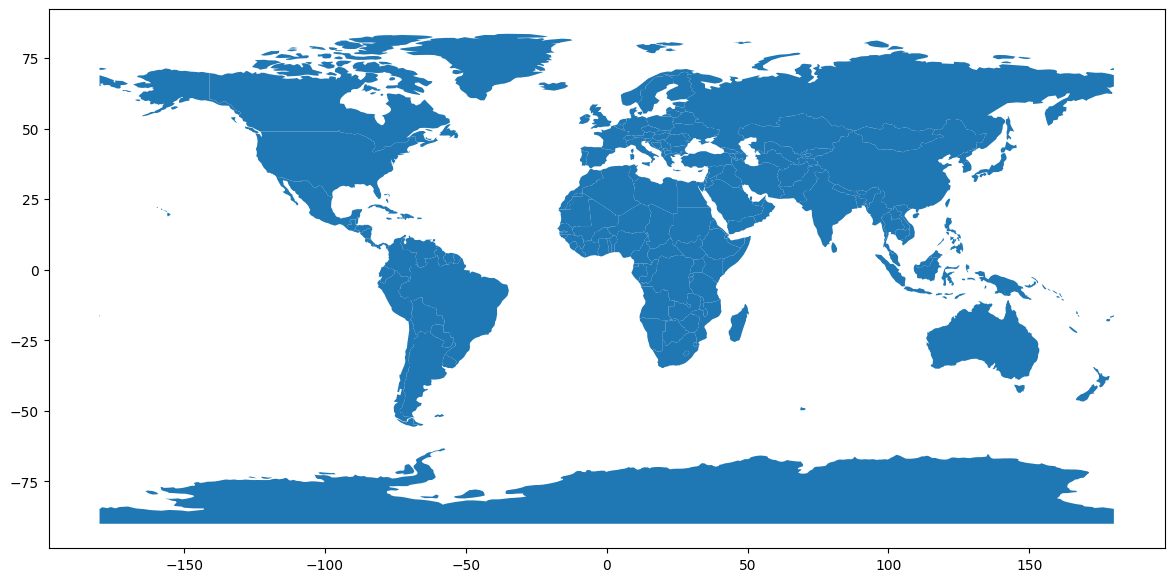

In [117]:
import geopandas as gpd
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # 'naturalearth_lowres' is a base map provided with geopandas which we loaded
df_world.plot(figsize=(15,7))

In [124]:
# merge
df_world_22_dec = df_world.merge(df35_22_dec_g, how='left', left_on=['name'], right_on=['Country'])
display(df_world_22_dec)
print()
df_world_22_dec.info()

df_world_22_dec.query("name == 'China'")

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,New_cases
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,375.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,81768.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,2111048.0
...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,22666.0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,1027.0
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,796.0



<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
 6   Country     145 non-null    object  
 7   New_cases   145 non-null    float64 
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 12.4+ KB


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,New_cases
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",China,75258368.0


In [122]:
# ax = df_world["geometry"].boundary.plot(figsize=(20,16))

In [108]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

Text(0.5, 1.0, 'China Reveal account for ~80% of global new Covid cases in December 2022')

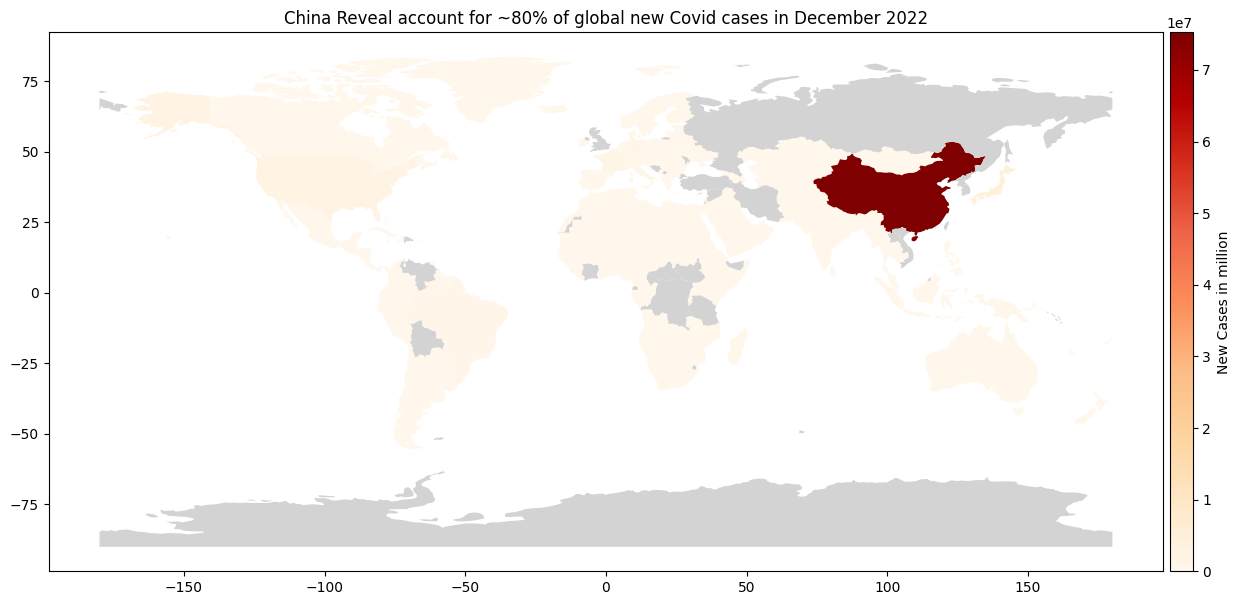

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad="0.5%")
df_world_22_dec.plot(column="New_cases",
                     ax=ax,
                     cax=cax,
                     cmap='OrRd',
                     legend=True,
                     legend_kwds={"label": "New Cases in million"},
                     missing_kwds={'color': 'lightgrey'})

ax.set_title("China Reveal account for ~80% of global new Covid cases in December 2022")

In [ ]:
ref: https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/

Energy


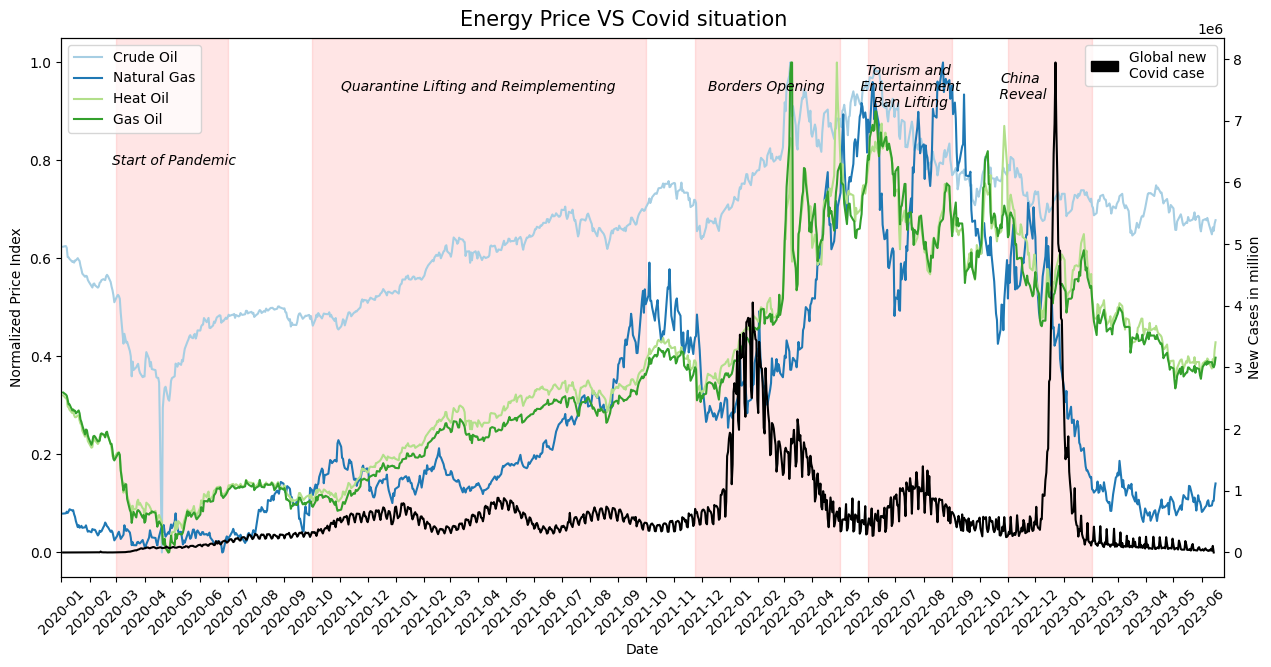

In [ ]:
print("Energy")
df_energy = pd.DataFrame()
for i in range(len(dataframes)):
    if dataframes[i][1] == 'Energy':
      df_energy = pd.concat([df_energy, dataframes[i][0]])

plt.figure(figsize = [15,7])
plt.suptitle('Energy Price VS Covid situation', size = 15, y=0.92)
ax1 = sns.lineplot(
        x='Date',
        y='Norm_price',
        data=df_energy,
        sort=True,
        color='blue',
        palette="Paired",
        hue='Commodity',
        legend = 'full'
)
ax1.set_ylabel('Normalized Price Index')
#ax1.set_ylim(-50, 150)
#ax1_patch = mpatches.Patch(color='blue', label='Price')
#ax1.legend(handles=[ax1_patch], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2 = sns.lineplot(
        x='Date_reported',
        y='New_cases',
        data=df36,
        color='black',
        sort=True,
        alpha=1,
        ax = ax2       # Pre-existing axes for the plot
    )
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Global new \nCovid case')
#ax2.set_ylim(-0.1, 0.1)
ax2_patch = mpatches.Patch(color='black', label='Global new \nCovid case')
ax2.legend(handles=[ax2_patch], loc="upper right")

ax1.axvspan(*mdates.datestr2num(['2020-03-01', '2020-07-01']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2020-05-03']), 0.8, "Start of Pandemic",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['10/01/2020', '10/01/2021']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2021-04-01']), 0.95, "Quarantine Lifting and Reimplementing",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/24/2021', '05/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-02-10']), 0.95, "Borders Opening",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['06/01/2022', '09/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-07-15']), 0.95, "Tourism and\n Entertainment\n Ban Lifting",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/01/2022', '02/01/2023']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-11-15']), 0.95, "China\n Reveal",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

locator = mdates.MonthLocator()
Axis.set_major_locator(ax1.xaxis,locator)
plt.setp(ax1.get_xticklabels(), rotation = 45, horizontalalignment='center')
plt.xticks(fontsize = 5)
#plt.yticks(fontsize = 5)
plt.ylabel('New Cases in million')
plt.yscale('linear')
plt.xlim(*mdates.datestr2num(['2020-01-01', '2023-06-25']))
ax1.legend(fontsize=10, loc="upper left")
plt.show()

Meat


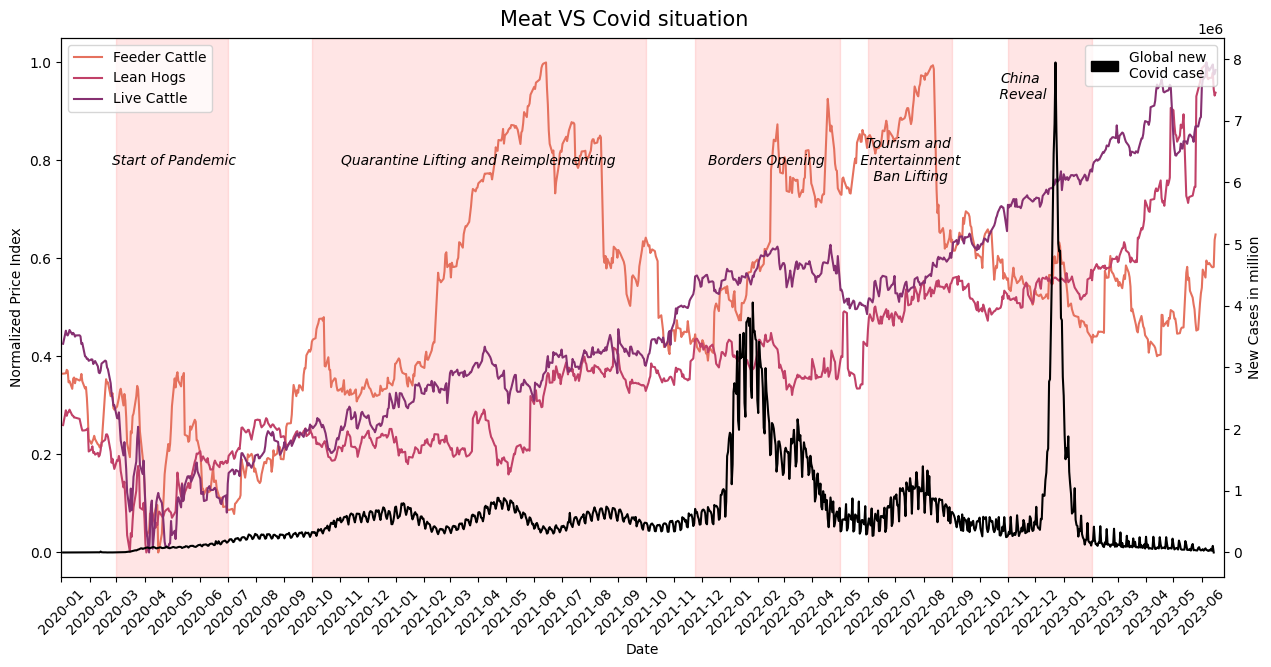

In [ ]:
print("Meat")
df_meat = pd.DataFrame()
for i in range(len(dataframes)):
    if dataframes[i][1] == 'Meat':
      df_meat = pd.concat([df_meat, dataframes[i][0]])

plt.figure(figsize = [15,7])
plt.suptitle('Meat VS Covid situation', size = 15, y=0.92)
ax1 = sns.lineplot(
        x='Date',
        y='Norm_price',
        data=df_meat,
        sort=True,
        palette="flare",
        hue='Commodity',
        legend = 'full'
)
ax1.set_ylabel('Normalized Price Index')
#ax1.set_ylim(-50, 150)
#ax1_patch = mpatches.Patch(color='blue', label='Price')
#ax1.legend(handles=[ax1_patch], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2 = sns.lineplot(
        x='Date_reported',
        y='New_cases',
        data=df36,
        color='black',
        sort=True,
        alpha=1,
        #legend = 'full',
        ax = ax2       # Pre-existing axes for the plot
    )
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Global new \nCovid case')
#ax2.set_ylim(-0.1, 0.1)
ax2_patch = mpatches.Patch(color='black', label='Global new \nCovid case')
ax2.legend(handles=[ax2_patch], loc="upper right")

ax1.axvspan(*mdates.datestr2num(['2020-03-01', '2020-07-01']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2020-05-03']), 0.8, "Start of Pandemic",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['10/01/2020', '10/01/2021']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2021-04-01']), 0.8, "Quarantine Lifting and Reimplementing",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/24/2021', '05/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-02-10']), 0.8, "Borders Opening",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['06/01/2022', '09/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-07-15']), 0.8, "Tourism and\n Entertainment\n Ban Lifting",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/01/2022', '02/01/2023']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-11-15']), 0.95, "China\n Reveal",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

locator = mdates.MonthLocator()
Axis.set_major_locator(ax1.xaxis,locator)
plt.setp(ax1.get_xticklabels(), rotation = 45, horizontalalignment='center')
plt.xticks(fontsize = 5)
#plt.yticks(fontsize = 5)
plt.ylabel('New Cases in million')
plt.yscale('linear')
plt.xlim(*mdates.datestr2num(['2020-01-01', '2023-06-25']))
ax1.legend(fontsize=10, loc="upper left")
plt.show()

Grain


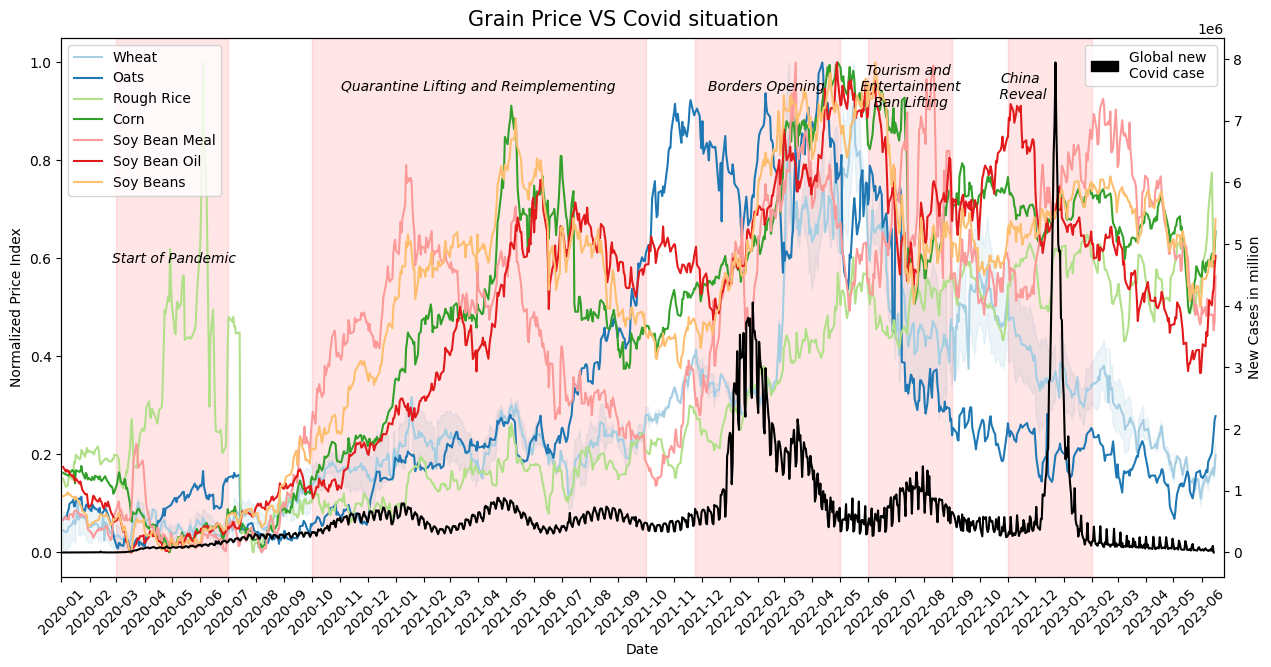

In [ ]:
print("Grain")
df_grain = pd.DataFrame()
for i in range(len(dataframes)):
    if dataframes[i][1] == 'Grain':
      df_grain = pd.concat([df_grain, dataframes[i][0]])

plt.figure(figsize = [15,7])
plt.suptitle('Grain Price VS Covid situation', size = 15, y=0.92)
ax1 = sns.lineplot(
        x='Date',
        y='Norm_price',
        data=df_grain,
        sort=True,
        #color='blue',
        palette="Paired",
        hue='Commodity',
        legend = 'full'
)
ax1.set_ylabel('Normalized Price Index')
#ax1.set_ylim(-50, 150)
#ax1_patch = mpatches.Patch(color='blue', label='Price')
#ax1.legend(handles=[ax1_patch], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2 = sns.lineplot(
        x='Date_reported',
        y='New_cases',
        data=df36,
        color='black',
        sort=True,
        alpha=1,
        ax = ax2       # Pre-existing axes for the plot
    )
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Global new \nCovid case')
#ax2.set_ylim(-0.1, 0.1)
ax2_patch = mpatches.Patch(color='black', label='Global new \nCovid case')
ax2.legend(handles=[ax2_patch], loc="upper right")

ax1.axvspan(*mdates.datestr2num(['2020-03-01', '2020-07-01']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2020-05-03']), 0.6, "Start of Pandemic",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['10/01/2020', '10/01/2021']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2021-04-01']), 0.95, "Quarantine Lifting and Reimplementing",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/24/2021', '05/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-02-10']), 0.95, "Borders Opening",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['06/01/2022', '09/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-07-15']), 0.95, "Tourism and\n Entertainment\n Ban Lifting",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/01/2022', '02/01/2023']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-11-15']), 0.95, "China\n Reveal",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

locator = mdates.MonthLocator()
Axis.set_major_locator(ax1.xaxis,locator)
plt.setp(ax1.get_xticklabels(), rotation = 45, horizontalalignment='center')
plt.xticks(fontsize = 5)
#plt.yticks(fontsize = 5)
plt.ylabel('New Cases in million')
plt.yscale('linear')
plt.xlim(*mdates.datestr2num(['2020-01-01', '2023-06-25']))
ax1.legend(fontsize=10, loc="upper left")
plt.show()

Metal


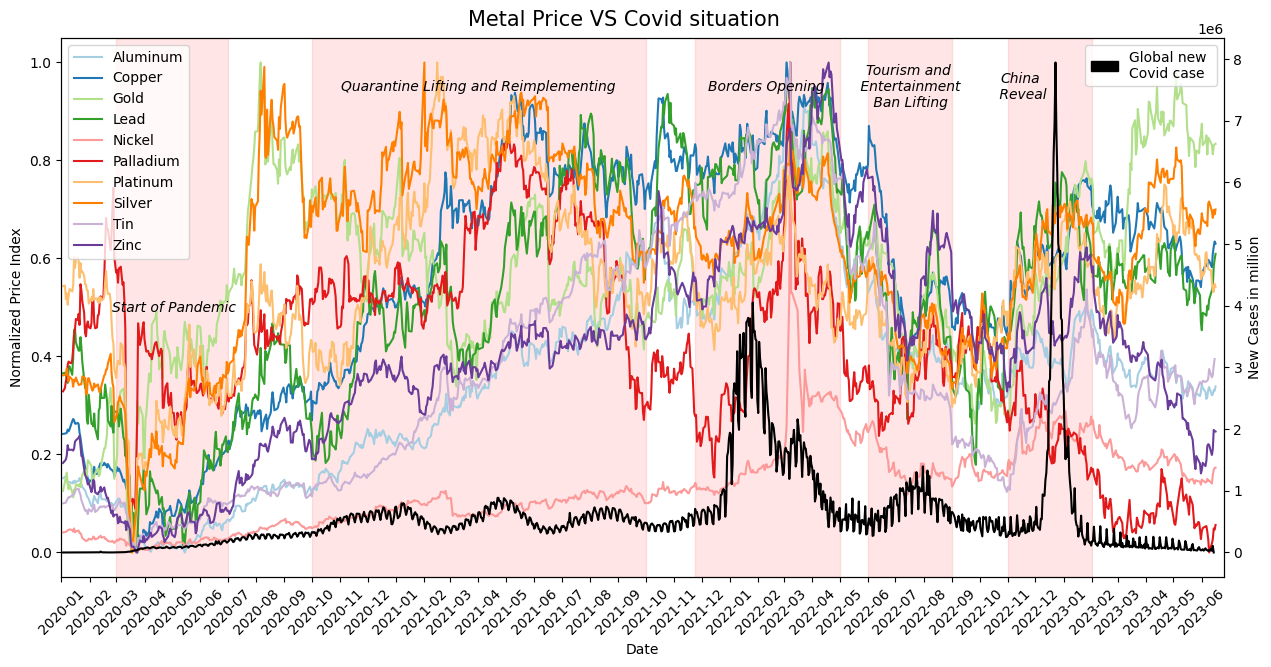

In [ ]:
print("Metal")
df_metal = pd.DataFrame()
for i in range(len(dataframes)):
    if dataframes[i][1] == 'Metal':
      df_metal = pd.concat([df_metal, dataframes[i][0]])

plt.figure(figsize = [15,7])
plt.suptitle('Metal Price VS Covid situation', size = 15, y=0.92)
ax1 = sns.lineplot(
        x='Date',
        y='Norm_price',
        data=df_metal,
        sort=True,
        color='blue',
        palette="Paired",
        hue='Commodity',
        legend = 'full'
)
ax1.set_ylabel('Normalized Price Index')
#ax1.set_ylim(-50, 150)
#ax1_patch = mpatches.Patch(color='blue', label='Price')
#x1.legend(handles=[ax1_patch], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2 = sns.lineplot(
        x='Date_reported',
        y='New_cases',
        data=df36,
        color='black',
        sort=True,
        alpha=1,
        ax = ax2       # Pre-existing axes for the plot
    )
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Global new \nCovid case')
#ax2.set_ylim(-0.1, 0.1)
ax2_patch = mpatches.Patch(color='black', label='Global new \nCovid case')
ax2.legend(handles=[ax2_patch], loc="upper right")

ax1.axvspan(*mdates.datestr2num(['2020-03-01', '2020-07-01']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2020-05-03']), 0.5, "Start of Pandemic",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['10/01/2020', '10/01/2021']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2021-04-01']), 0.95, "Quarantine Lifting and Reimplementing",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/24/2021', '05/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-02-10']), 0.95, "Borders Opening",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['06/01/2022', '09/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-07-15']), 0.95, "Tourism and\n Entertainment\n Ban Lifting",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/01/2022', '02/01/2023']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-11-15']), 0.95, "China\n Reveal",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

locator = mdates.MonthLocator()
Axis.set_major_locator(ax1.xaxis,locator)
plt.setp(ax1.get_xticklabels(), rotation = 45, horizontalalignment='center')
plt.xticks(fontsize = 5)
#plt.yticks(fontsize = 5)
plt.ylabel('New Cases in million')
plt.yscale('linear')
plt.xlim(*mdates.datestr2num(['2020-01-01', '2023-06-25']))
ax1.legend(fontsize=10, loc="upper left")
plt.show()

Softs


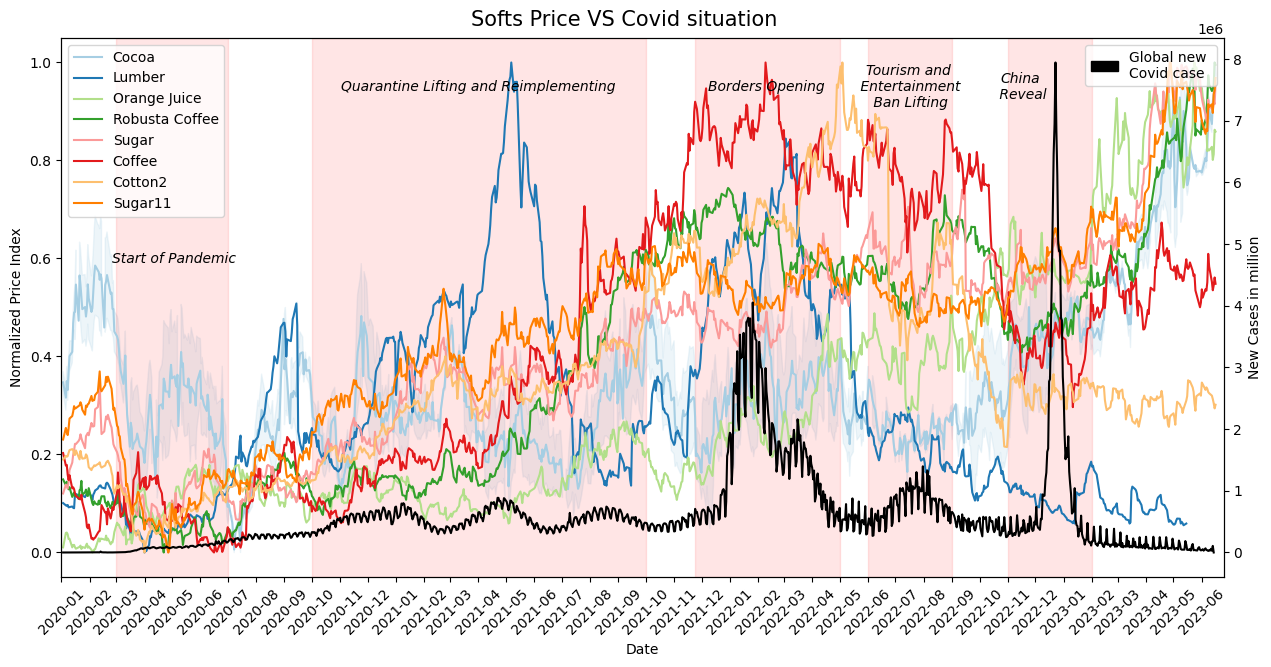

In [ ]:
print("Softs")
df_softs = pd.DataFrame()
for i in range(len(dataframes)):
    if dataframes[i][1] == 'Softs':
      df_softs = pd.concat([df_softs, dataframes[i][0]])

plt.figure(figsize = [15,7])
plt.suptitle('Softs Price VS Covid situation', size = 15, y=0.92)
ax1 = sns.lineplot(
        x='Date',
        y='Norm_price',
        data=df_softs,
        sort=True,
        color='blue',
        palette="Paired",
        hue='Commodity',
        legend = 'full'
)
ax1.set_ylabel('Normalized Price Index')
#ax1.set_ylim(-50, 150)
#ax1_patch = mpatches.Patch(color='blue', label='Price')
#ax1.legend(handles=[ax1_patch], loc="upper left")
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2 = sns.lineplot(
        x='Date_reported',
        y='New_cases',
        data=df36,
        color='black',
        sort=True,
        alpha=1,
        ax = ax2       # Pre-existing axes for the plot
    )
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Global new \nCovid case')
#ax2.set_ylim(-0.1, 0.1)
ax2_patch = mpatches.Patch(color='black', label='Global new \nCovid case')
ax2.legend(handles=[ax2_patch], loc="upper right")

ax1.axvspan(*mdates.datestr2num(['2020-03-01', '2020-07-01']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2020-05-03']), 0.6, "Start of Pandemic",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['10/01/2020', '10/01/2021']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2021-04-01']), 0.95, "Quarantine Lifting and Reimplementing",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/24/2021', '05/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-02-10']), 0.95, "Borders Opening",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['06/01/2022', '09/01/2022']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-07-15']), 0.95, "Tourism and\n Entertainment\n Ban Lifting",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

ax1.axvspan(*mdates.datestr2num(['11/01/2022', '02/01/2023']), color="red", alpha=0.1)
ax1.text(*mdates.datestr2num(['2022-11-15']), 0.95, "China\n Reveal",
       fontsize = 10,          # Size
       fontstyle = "oblique",  # Style
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center") # Vertical alignment

locator = mdates.MonthLocator()
Axis.set_major_locator(ax1.xaxis,locator)
plt.setp(ax1.get_xticklabels(), rotation = 45, horizontalalignment='center')
plt.xticks(fontsize = 5)
#plt.yticks(fontsize = 5)
plt.ylabel('New Cases in million')
plt.yscale('linear')
plt.xlim(*mdates.datestr2num(['2020-01-01', '2023-06-25']))
ax1.legend(fontsize=10, loc="upper left")
plt.show()